# **SALES PREDICTION USING PYTHON**

**Problem Statement:-**

• Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and
advertising platform selection. 

• In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machine learning techniques in Python to analyze and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark on the journey of sales prediction using machine learning in Python.

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv("Advertising.csv") #loading the dataset 

### Data Collection and Exploration


In [60]:
headers = ["index", 'TV', 'Radio', 'Newspaper', 'Sales']
print("headers\n", headers)

headers
 ['index', 'TV', 'Radio', 'Newspaper', 'Sales']


In [61]:
df.columns=headers
print(df.head())

   index     TV  Radio  Newspaper  Sales
0      1  230.1   37.8       69.2   22.1
1      2   44.5   39.3       45.1   10.4
2      3   17.2   45.9       69.3    9.3
3      4  151.5   41.3       58.5   18.5
4      5  180.8   10.8       58.4   12.9


In [62]:
df.describe()   #exploring the data

,index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [63]:
df.info() #for checking null bhalues

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

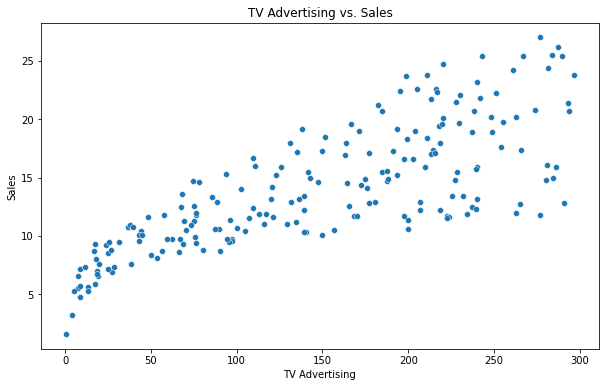

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title('TV Advertising vs. Sales')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.show() # Scatter plot of TV advertising expenditure vs. sales

              index        TV     Radio  Newspaper     Sales
index      1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV         0.017715  1.000000  0.054809   0.056648  0.782224
Radio     -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper -0.154944  0.056648  0.354104   1.000000  0.228299
Sales     -0.051616  0.782224  0.576223   0.228299  1.000000


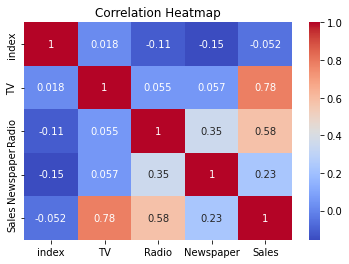

In [66]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()  # correlation analysis

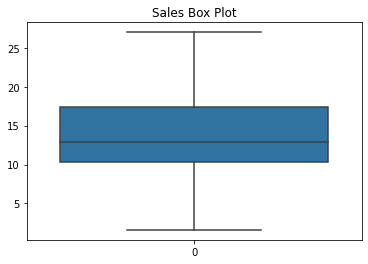

In [67]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['Sales'])
plt.title('Sales Box Plot')
plt.show()  # Boxplot of sales

### Data Splitting

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [70]:
# spliting the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # (80% train, 20% test)

### Model Selection & Training

In [71]:
# Initializing the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression() In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. LinearRegression LinearRegression()

In [72]:
y_pred = model.predict(X_test) #makin prediction on test ds

In [73]:
# calculation of ev metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

In [74]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 3.1990044685889067
Root Mean Squared Error: 1.7885761008659673
Mean Absolute Error: 1.465060105010293


These metrics help to understand how well the model's predictions match the actual sales values. Lower values of MSE, RMSE, and MAE indicate better performance, as they represent smaller errors between predicted and actual values.

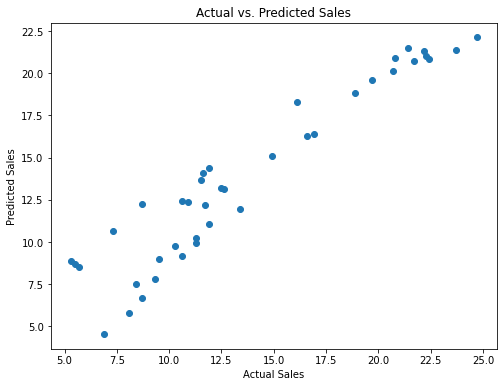

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show() #viz of model performance & plot predicted sales vs actual sale